In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import *
import matplotlib.pyplot as plt
import random
import copy

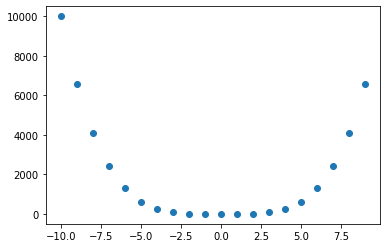

In [2]:
x = np.vstack(np.arange(-10,10,1))
# y = np.array([[45000],[50000],[60000],[80000],[110000],[150000],[200000],[300000],[500000],[1000000]])
# y = 10* np.sin(x)
# x = np.vstack(np.sort(5 * np.random.rand(40, 1), axis=0))
y = [xi**4 for xi in x]
# y += [ yi + 3 * (0.5 - np.random.rand()) for yi in y]
plt.scatter(x,y)
plt.show()
orig_x = copy.deepcopy(x)
orig_y = copy.deepcopy(y)
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [3]:
gamma = 0.9
deg = 4
box = 10.0
K = kernel.poly(x,gamma,deg=deg)
x_init = np.zeros(x.shape)
beta = solveDeflected(x_init, y, K, box, {'eps':1e-2, 'maxiter':1e+4}, True)

i:    0 - v: 0.000000 - fref:  inf - ||g||: 4.472136 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000092 - fref: 0.000000 - ||g||: 4.125551 - delta: 1.000000e-04 - ||gdiff||: 0.346585 - eps: 1.000000e-02
i:    2 - v: -0.007521 - fref: -0.000092 - ||g||: 4.000501 - delta: 1.000000e-02 - ||gdiff||: 0.125050 - eps: 1.000000e-02
i:    3 - v: -0.014508 - fref: -0.007521 - ||g||: 3.882270 - delta: 1.000000e-02 - ||gdiff||: 0.118231 - eps: 1.000000e-02
i:    4 - v: -0.021366 - fref: -0.014508 - ||g||: 3.765807 - delta: 1.000000e-02 - ||gdiff||: 0.116464 - eps: 1.000000e-02
i:    5 - v: -0.028170 - fref: -0.021366 - ||g||: 3.649807 - delta: 1.000000e-02 - ||gdiff||: 0.116000 - eps: 1.000000e-02
i:    6 - v: -0.034937 - fref: -0.028170 - ||g||: 3.534605 - delta: 1.000000e-02 - ||gdiff||: 0.115202 - eps: 1.000000e-02
i:    7 - v: -0.041663 - fref: -0.034937 - ||g||: 3.420798 - delta: 1.000000e-02 - ||gdiff||: 0.113807 - eps: 1.000000e-02
i:    8 - v: -0.048330 - fr

i:  216 - v: -0.261113 - fref: -0.261020 - ||g||: 3.079014 - delta: 1.423957e-03 - ||gdiff||: 0.042189 - eps: 1.000000e-03
i:  217 - v: -0.261203 - fref: -0.261113 - ||g||: 3.083118 - delta: 1.352760e-03 - ||gdiff||: -0.004104 - eps: 1.000000e-03
i:  218 - v: -0.261289 - fref: -0.261203 - ||g||: 3.078984 - delta: 1.285122e-03 - ||gdiff||: 0.004133 - eps: 1.000000e-03
i:  219 - v: -0.261372 - fref: -0.261289 - ||g||: 3.078945 - delta: 1.220865e-03 - ||gdiff||: 0.000039 - eps: 1.000000e-03
i:  220 - v: -0.261449 - fref: -0.261372 - ||g||: 3.121166 - delta: 1.159822e-03 - ||gdiff||: -0.042221 - eps: 1.000000e-03
i:  221 - v: -0.261522 - fref: -0.261449 - ||g||: 3.121201 - delta: 1.101831e-03 - ||gdiff||: -0.000036 - eps: 1.000000e-03
i:  222 - v: -0.261591 - fref: -0.261522 - ||g||: 3.078992 - delta: 1.046740e-03 - ||gdiff||: 0.042209 - eps: 1.000000e-03
i:  223 - v: -0.261658 - fref: -0.261591 - ||g||: 3.083101 - delta: 1.000000e-03 - ||gdiff||: -0.004109 - eps: 1.000000e-03
i:  224 - v:

i:  381 - v: -0.272188 - fref: -0.272123 - ||g||: 3.079016 - delta: 1.000000e-03 - ||gdiff||: 0.042215 - eps: 1.000000e-03
i:  382 - v: -0.272256 - fref: -0.272188 - ||g||: 3.079002 - delta: 1.000000e-03 - ||gdiff||: 0.000014 - eps: 1.000000e-03
i:  383 - v: -0.272322 - fref: -0.272256 - ||g||: 3.083090 - delta: 1.000000e-03 - ||gdiff||: -0.004088 - eps: 1.000000e-03
i:  384 - v: -0.272390 - fref: -0.272322 - ||g||: 3.121218 - delta: 1.000000e-03 - ||gdiff||: -0.038128 - eps: 1.000000e-03
i:  385 - v: -0.272456 - fref: -0.272390 - ||g||: 3.078992 - delta: 1.000000e-03 - ||gdiff||: 0.042226 - eps: 1.000000e-03
i:  386 - v: -0.272523 - fref: -0.272456 - ||g||: 3.078975 - delta: 1.000000e-03 - ||gdiff||: 0.000017 - eps: 1.000000e-03
i:  387 - v: -0.272590 - fref: -0.272523 - ||g||: 3.121206 - delta: 1.000000e-03 - ||gdiff||: -0.042231 - eps: 1.000000e-03
i:  388 - v: -0.272656 - fref: -0.272590 - ||g||: 3.121239 - delta: 1.000000e-03 - ||gdiff||: -0.000034 - eps: 1.000000e-03
i:  389 - v:

i:  554 - v: -0.276193 - fref: -0.276186 - ||g||: 3.122449 - delta: 1.000000e-04 - ||gdiff||: 0.002630 - eps: 1.000000e-04
i:  555 - v: -0.276200 - fref: -0.276193 - ||g||: 3.125090 - delta: 1.000000e-04 - ||gdiff||: -0.002641 - eps: 1.000000e-04
i:  556 - v: -0.276206 - fref: -0.276200 - ||g||: 3.122461 - delta: 1.000000e-04 - ||gdiff||: 0.002629 - eps: 1.000000e-04
i:  557 - v: -0.276213 - fref: -0.276206 - ||g||: 3.122467 - delta: 1.000000e-04 - ||gdiff||: -0.000006 - eps: 1.000000e-04
i:  558 - v: -0.276219 - fref: -0.276213 - ||g||: 3.041554 - delta: 1.000000e-04 - ||gdiff||: 0.080913 - eps: 1.000000e-04
i:  559 - v: -0.276226 - fref: -0.276219 - ||g||: 3.125102 - delta: 1.000000e-04 - ||gdiff||: -0.083547 - eps: 1.000000e-04
i:  560 - v: -0.276232 - fref: -0.276226 - ||g||: 3.122469 - delta: 1.000000e-04 - ||gdiff||: 0.002632 - eps: 1.000000e-04
i:  561 - v: -0.276239 - fref: -0.276232 - ||g||: 3.122474 - delta: 1.000000e-04 - ||gdiff||: -0.000005 - eps: 1.000000e-04
i:  562 - v:

i:  745 - v: -0.276826 - fref: -0.276826 - ||g||: 3.167075 - delta: 1.000000e-05 - ||gdiff||: -0.086533 - eps: 1.000000e-05
i:  746 - v: -0.276827 - fref: -0.276826 - ||g||: 3.122791 - delta: 1.000000e-05 - ||gdiff||: 0.044283 - eps: 1.000000e-05
i:  747 - v: -0.276828 - fref: -0.276827 - ||g||: 3.080544 - delta: 1.000000e-05 - ||gdiff||: 0.042248 - eps: 1.000000e-05
i:  748 - v: -0.276828 - fref: -0.276828 - ||g||: 3.125427 - delta: 1.000000e-05 - ||gdiff||: -0.044883 - eps: 1.000000e-05
i:  749 - v: -0.276829 - fref: -0.276828 - ||g||: 3.084657 - delta: 1.000000e-05 - ||gdiff||: 0.040769 - eps: 1.000000e-05
i:  750 - v: -0.276830 - fref: -0.276829 - ||g||: 3.122792 - delta: 1.000000e-05 - ||gdiff||: -0.038135 - eps: 1.000000e-05
i:  751 - v: -0.276830 - fref: -0.276830 - ||g||: 3.125428 - delta: 1.000000e-05 - ||gdiff||: -0.002635 - eps: 1.000000e-05
i:  752 - v: -0.276831 - fref: -0.276830 - ||g||: 3.122793 - delta: 1.000000e-05 - ||gdiff||: 0.002634 - eps: 1.000000e-05
i:  753 - v:

i:  935 - v: -0.276951 - fref: -0.276951 - ||g||: 3.080608 - delta: 1.000000e-05 - ||gdiff||: 0.086530 - eps: 1.000000e-05
i:  936 - v: -0.276952 - fref: -0.276951 - ||g||: 3.084721 - delta: 1.000000e-05 - ||gdiff||: -0.004113 - eps: 1.000000e-05
i:  937 - v: -0.276952 - fref: -0.276952 - ||g||: 3.167139 - delta: 1.000000e-05 - ||gdiff||: -0.082418 - eps: 1.000000e-05
i:  938 - v: -0.276953 - fref: -0.276952 - ||g||: 3.080609 - delta: 1.000000e-05 - ||gdiff||: 0.086530 - eps: 1.000000e-05
i:  939 - v: -0.276954 - fref: -0.276953 - ||g||: 3.080609 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i:  940 - v: -0.276954 - fref: -0.276954 - ||g||: 3.167140 - delta: 1.000000e-05 - ||gdiff||: -0.086531 - eps: 1.000000e-05
i:  941 - v: -0.276955 - fref: -0.276954 - ||g||: 3.122858 - delta: 1.000000e-05 - ||gdiff||: 0.044282 - eps: 1.000000e-05
i:  942 - v: -0.276956 - fref: -0.276955 - ||g||: 3.041946 - delta: 1.000000e-05 - ||gdiff||: 0.080911 - eps: 1.000000e-05
i:  943 - v:

i: 1133 - v: -0.277081 - fref: -0.277080 - ||g||: 3.080676 - delta: 1.000000e-05 - ||gdiff||: 0.086529 - eps: 1.000000e-05
i: 1134 - v: -0.277082 - fref: -0.277081 - ||g||: 3.122922 - delta: 1.000000e-05 - ||gdiff||: -0.042247 - eps: 1.000000e-05
i: 1135 - v: -0.277082 - fref: -0.277082 - ||g||: 3.125557 - delta: 1.000000e-05 - ||gdiff||: -0.002635 - eps: 1.000000e-05
i: 1136 - v: -0.277083 - fref: -0.277082 - ||g||: 3.084789 - delta: 1.000000e-05 - ||gdiff||: 0.040768 - eps: 1.000000e-05
i: 1137 - v: -0.277084 - fref: -0.277083 - ||g||: 3.080677 - delta: 1.000000e-05 - ||gdiff||: 0.004113 - eps: 1.000000e-05
i: 1138 - v: -0.277084 - fref: -0.277084 - ||g||: 3.167206 - delta: 1.000000e-05 - ||gdiff||: -0.086529 - eps: 1.000000e-05
i: 1139 - v: -0.277085 - fref: -0.277084 - ||g||: 3.122924 - delta: 1.000000e-05 - ||gdiff||: 0.044282 - eps: 1.000000e-05
i: 1140 - v: -0.277086 - fref: -0.277085 - ||g||: 3.080678 - delta: 1.000000e-05 - ||gdiff||: 0.042246 - eps: 1.000000e-05
i: 1141 - v: 

i: 1312 - v: -0.277199 - fref: -0.277198 - ||g||: 3.167263 - delta: 1.000000e-05 - ||gdiff||: -0.086528 - eps: 1.000000e-05
i: 1313 - v: -0.277199 - fref: -0.277199 - ||g||: 3.080736 - delta: 1.000000e-05 - ||gdiff||: 0.086527 - eps: 1.000000e-05
i: 1314 - v: -0.277200 - fref: -0.277199 - ||g||: 3.167264 - delta: 1.000000e-05 - ||gdiff||: -0.086528 - eps: 1.000000e-05
i: 1315 - v: -0.277201 - fref: -0.277200 - ||g||: 3.122983 - delta: 1.000000e-05 - ||gdiff||: 0.044281 - eps: 1.000000e-05
i: 1316 - v: -0.277201 - fref: -0.277201 - ||g||: 3.080738 - delta: 1.000000e-05 - ||gdiff||: 0.042246 - eps: 1.000000e-05
i: 1317 - v: -0.277202 - fref: -0.277201 - ||g||: 3.042074 - delta: 1.000000e-05 - ||gdiff||: 0.038664 - eps: 1.000000e-05
i: 1318 - v: -0.277203 - fref: -0.277202 - ||g||: 3.167265 - delta: 1.000000e-05 - ||gdiff||: -0.125191 - eps: 1.000000e-05
i: 1319 - v: -0.277203 - fref: -0.277203 - ||g||: 3.122984 - delta: 1.000000e-05 - ||gdiff||: 0.044281 - eps: 1.000000e-05
i: 1320 - v: 

i: 1485 - v: -0.277312 - fref: -0.277311 - ||g||: 3.125673 - delta: 1.000000e-05 - ||gdiff||: -0.040768 - eps: 1.000000e-05
i: 1486 - v: -0.277313 - fref: -0.277312 - ||g||: 3.123039 - delta: 1.000000e-05 - ||gdiff||: 0.002634 - eps: 1.000000e-05
i: 1487 - v: -0.277313 - fref: -0.277313 - ||g||: 3.080794 - delta: 1.000000e-05 - ||gdiff||: 0.042245 - eps: 1.000000e-05
i: 1488 - v: -0.277314 - fref: -0.277313 - ||g||: 3.167321 - delta: 1.000000e-05 - ||gdiff||: -0.086527 - eps: 1.000000e-05
i: 1489 - v: -0.277315 - fref: -0.277314 - ||g||: 3.123041 - delta: 1.000000e-05 - ||gdiff||: 0.044280 - eps: 1.000000e-05
i: 1490 - v: -0.277315 - fref: -0.277315 - ||g||: 3.080796 - delta: 1.000000e-05 - ||gdiff||: 0.042245 - eps: 1.000000e-05
i: 1491 - v: -0.277316 - fref: -0.277315 - ||g||: 3.087574 - delta: 1.000000e-05 - ||gdiff||: -0.006778 - eps: 1.000000e-05
i: 1492 - v: -0.277317 - fref: -0.277316 - ||g||: 3.123041 - delta: 1.000000e-05 - ||gdiff||: -0.035467 - eps: 1.000000e-05
i: 1493 - v:

i: 1641 - v: -0.277415 - fref: -0.277414 - ||g||: 3.167370 - delta: 1.000000e-05 - ||gdiff||: -0.086526 - eps: 1.000000e-05
i: 1642 - v: -0.277415 - fref: -0.277415 - ||g||: 3.080846 - delta: 1.000000e-05 - ||gdiff||: 0.086525 - eps: 1.000000e-05
i: 1643 - v: -0.277416 - fref: -0.277415 - ||g||: 3.167371 - delta: 1.000000e-05 - ||gdiff||: -0.086526 - eps: 1.000000e-05
i: 1644 - v: -0.277416 - fref: -0.277416 - ||g||: 3.080847 - delta: 1.000000e-05 - ||gdiff||: 0.086525 - eps: 1.000000e-05
i: 1645 - v: -0.277417 - fref: -0.277416 - ||g||: 3.084959 - delta: 1.000000e-05 - ||gdiff||: -0.004112 - eps: 1.000000e-05
i: 1646 - v: -0.277418 - fref: -0.277417 - ||g||: 3.080847 - delta: 1.000000e-05 - ||gdiff||: 0.004112 - eps: 1.000000e-05
i: 1647 - v: -0.277418 - fref: -0.277418 - ||g||: 3.167372 - delta: 1.000000e-05 - ||gdiff||: -0.086525 - eps: 1.000000e-05
i: 1648 - v: -0.277419 - fref: -0.277418 - ||g||: 3.080847 - delta: 1.000000e-05 - ||gdiff||: 0.086525 - eps: 1.000000e-05
i: 1649 - v:

i: 1842 - v: -0.277546 - fref: -0.277546 - ||g||: 3.123156 - delta: 1.000000e-05 - ||gdiff||: 0.002633 - eps: 1.000000e-05
i: 1843 - v: -0.277547 - fref: -0.277546 - ||g||: 3.123156 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 1844 - v: -0.277548 - fref: -0.277547 - ||g||: 3.125790 - delta: 1.000000e-05 - ||gdiff||: -0.002634 - eps: 1.000000e-05
i: 1845 - v: -0.277548 - fref: -0.277548 - ||g||: 3.085024 - delta: 1.000000e-05 - ||gdiff||: 0.040766 - eps: 1.000000e-05
i: 1846 - v: -0.277549 - fref: -0.277548 - ||g||: 3.080913 - delta: 1.000000e-05 - ||gdiff||: 0.004111 - eps: 1.000000e-05
i: 1847 - v: -0.277550 - fref: -0.277549 - ||g||: 3.123157 - delta: 1.000000e-05 - ||gdiff||: -0.042244 - eps: 1.000000e-05
i: 1848 - v: -0.277550 - fref: -0.277550 - ||g||: 3.125791 - delta: 1.000000e-05 - ||gdiff||: -0.002634 - eps: 1.000000e-05
i: 1849 - v: -0.277551 - fref: -0.277550 - ||g||: 3.123158 - delta: 1.000000e-05 - ||gdiff||: 0.002633 - eps: 1.000000e-05
i: 1850 - v:

i: 2038 - v: -0.277675 - fref: -0.277674 - ||g||: 3.123219 - delta: 1.000000e-05 - ||gdiff||: -0.042244 - eps: 1.000000e-05
i: 2039 - v: -0.277676 - fref: -0.277675 - ||g||: 3.087753 - delta: 1.000000e-05 - ||gdiff||: 0.035466 - eps: 1.000000e-05
i: 2040 - v: -0.277676 - fref: -0.277676 - ||g||: 3.123219 - delta: 1.000000e-05 - ||gdiff||: -0.035467 - eps: 1.000000e-05
i: 2041 - v: -0.277677 - fref: -0.277676 - ||g||: 3.080976 - delta: 1.000000e-05 - ||gdiff||: 0.042243 - eps: 1.000000e-05
i: 2042 - v: -0.277678 - fref: -0.277677 - ||g||: 3.123220 - delta: 1.000000e-05 - ||gdiff||: -0.042244 - eps: 1.000000e-05
i: 2043 - v: -0.277678 - fref: -0.277678 - ||g||: 3.167499 - delta: 1.000000e-05 - ||gdiff||: -0.044279 - eps: 1.000000e-05
i: 2044 - v: -0.277679 - fref: -0.277678 - ||g||: 3.080977 - delta: 1.000000e-05 - ||gdiff||: 0.086521 - eps: 1.000000e-05
i: 2045 - v: -0.277680 - fref: -0.277679 - ||g||: 3.125855 - delta: 1.000000e-05 - ||gdiff||: -0.044877 - eps: 1.000000e-05
i: 2046 - v

i: 2191 - v: -0.277775 - fref: -0.277775 - ||g||: 3.167546 - delta: 1.000000e-05 - ||gdiff||: -0.044279 - eps: 1.000000e-05
i: 2192 - v: -0.277776 - fref: -0.277775 - ||g||: 3.081026 - delta: 1.000000e-05 - ||gdiff||: 0.086520 - eps: 1.000000e-05
i: 2193 - v: -0.277777 - fref: -0.277776 - ||g||: 3.085136 - delta: 1.000000e-05 - ||gdiff||: -0.004111 - eps: 1.000000e-05
i: 2194 - v: -0.277777 - fref: -0.277777 - ||g||: 3.081025 - delta: 1.000000e-05 - ||gdiff||: 0.004111 - eps: 1.000000e-05
i: 2195 - v: -0.277778 - fref: -0.277777 - ||g||: 3.167547 - delta: 1.000000e-05 - ||gdiff||: -0.086521 - eps: 1.000000e-05
i: 2196 - v: -0.277779 - fref: -0.277778 - ||g||: 3.081026 - delta: 1.000000e-05 - ||gdiff||: 0.086521 - eps: 1.000000e-05
i: 2197 - v: -0.277779 - fref: -0.277779 - ||g||: 3.123269 - delta: 1.000000e-05 - ||gdiff||: -0.042243 - eps: 1.000000e-05
i: 2198 - v: -0.277780 - fref: -0.277779 - ||g||: 3.125903 - delta: 1.000000e-05 - ||gdiff||: -0.002634 - eps: 1.000000e-05
i: 2199 - v

i: 2438 - v: -0.277937 - fref: -0.277937 - ||g||: 3.167623 - delta: 1.000000e-05 - ||gdiff||: -0.044278 - eps: 1.000000e-05
i: 2439 - v: -0.277938 - fref: -0.277937 - ||g||: 3.081104 - delta: 1.000000e-05 - ||gdiff||: 0.086519 - eps: 1.000000e-05
i: 2440 - v: -0.277939 - fref: -0.277938 - ||g||: 3.081104 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 2441 - v: -0.277939 - fref: -0.277939 - ||g||: 3.130031 - delta: 1.000000e-05 - ||gdiff||: -0.048927 - eps: 1.000000e-05
i: 2442 - v: -0.277940 - fref: -0.277939 - ||g||: 3.123347 - delta: 1.000000e-05 - ||gdiff||: 0.006684 - eps: 1.000000e-05
i: 2443 - v: -0.277941 - fref: -0.277940 - ||g||: 3.081105 - delta: 1.000000e-05 - ||gdiff||: 0.042242 - eps: 1.000000e-05
i: 2444 - v: -0.277941 - fref: -0.277941 - ||g||: 3.167625 - delta: 1.000000e-05 - ||gdiff||: -0.086520 - eps: 1.000000e-05
i: 2445 - v: -0.277942 - fref: -0.277941 - ||g||: 3.081106 - delta: 1.000000e-05 - ||gdiff||: 0.086519 - eps: 1.000000e-05
i: 2446 - v:

i: 2663 - v: -0.278085 - fref: -0.278084 - ||g||: 3.167692 - delta: 1.000000e-05 - ||gdiff||: -0.125179 - eps: 1.000000e-05
i: 2664 - v: -0.278086 - fref: -0.278085 - ||g||: 3.081175 - delta: 1.000000e-05 - ||gdiff||: 0.086517 - eps: 1.000000e-05
i: 2665 - v: -0.278086 - fref: -0.278086 - ||g||: 3.123416 - delta: 1.000000e-05 - ||gdiff||: -0.042242 - eps: 1.000000e-05
i: 2666 - v: -0.278087 - fref: -0.278086 - ||g||: 3.167693 - delta: 1.000000e-05 - ||gdiff||: -0.044277 - eps: 1.000000e-05
i: 2667 - v: -0.278088 - fref: -0.278087 - ||g||: 3.081176 - delta: 1.000000e-05 - ||gdiff||: 0.086517 - eps: 1.000000e-05
i: 2668 - v: -0.278088 - fref: -0.278088 - ||g||: 3.081176 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 2669 - v: -0.278089 - fref: -0.278088 - ||g||: 3.130102 - delta: 1.000000e-05 - ||gdiff||: -0.048925 - eps: 1.000000e-05
i: 2670 - v: -0.278090 - fref: -0.278089 - ||g||: 3.123418 - delta: 1.000000e-05 - ||gdiff||: 0.006683 - eps: 1.000000e-05
i: 2671 - v

i: 2801 - v: -0.278176 - fref: -0.278175 - ||g||: 3.123459 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 2802 - v: -0.278176 - fref: -0.278176 - ||g||: 3.081218 - delta: 1.000000e-05 - ||gdiff||: 0.042241 - eps: 1.000000e-05
i: 2803 - v: -0.278177 - fref: -0.278176 - ||g||: 3.130143 - delta: 1.000000e-05 - ||gdiff||: -0.048925 - eps: 1.000000e-05
i: 2804 - v: -0.278178 - fref: -0.278177 - ||g||: 3.081219 - delta: 1.000000e-05 - ||gdiff||: 0.048924 - eps: 1.000000e-05
i: 2805 - v: -0.278178 - fref: -0.278178 - ||g||: 3.123460 - delta: 1.000000e-05 - ||gdiff||: -0.042241 - eps: 1.000000e-05
i: 2806 - v: -0.278179 - fref: -0.278178 - ||g||: 3.126093 - delta: 1.000000e-05 - ||gdiff||: -0.002633 - eps: 1.000000e-05
i: 2807 - v: -0.278180 - fref: -0.278179 - ||g||: 3.123461 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 2808 - v: -0.278180 - fref: -0.278180 - ||g||: 3.123461 - delta: 1.000000e-05 - ||gdiff||: -0.000001 - eps: 1.000000e-05
i: 2809 - v:

i: 2973 - v: -0.278288 - fref: -0.278288 - ||g||: 3.167786 - delta: 1.000000e-05 - ||gdiff||: -0.086516 - eps: 1.000000e-05
i: 2974 - v: -0.278289 - fref: -0.278288 - ||g||: 3.081271 - delta: 1.000000e-05 - ||gdiff||: 0.086515 - eps: 1.000000e-05
i: 2975 - v: -0.278290 - fref: -0.278289 - ||g||: 3.123512 - delta: 1.000000e-05 - ||gdiff||: -0.042241 - eps: 1.000000e-05
i: 2976 - v: -0.278290 - fref: -0.278290 - ||g||: 3.126145 - delta: 1.000000e-05 - ||gdiff||: -0.002633 - eps: 1.000000e-05
i: 2977 - v: -0.278291 - fref: -0.278290 - ||g||: 3.085382 - delta: 1.000000e-05 - ||gdiff||: 0.040763 - eps: 1.000000e-05
i: 2978 - v: -0.278292 - fref: -0.278291 - ||g||: 3.081272 - delta: 1.000000e-05 - ||gdiff||: 0.004109 - eps: 1.000000e-05
i: 2979 - v: -0.278292 - fref: -0.278292 - ||g||: 3.167788 - delta: 1.000000e-05 - ||gdiff||: -0.086516 - eps: 1.000000e-05
i: 2980 - v: -0.278293 - fref: -0.278292 - ||g||: 3.123514 - delta: 1.000000e-05 - ||gdiff||: 0.044274 - eps: 1.000000e-05
i: 2981 - v:

i: 3203 - v: -0.278439 - fref: -0.278439 - ||g||: 3.123581 - delta: 1.000000e-05 - ||gdiff||: -0.042240 - eps: 1.000000e-05
i: 3204 - v: -0.278440 - fref: -0.278439 - ||g||: 3.126214 - delta: 1.000000e-05 - ||gdiff||: -0.002633 - eps: 1.000000e-05
i: 3205 - v: -0.278441 - fref: -0.278440 - ||g||: 3.123582 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 3206 - v: -0.278441 - fref: -0.278441 - ||g||: 3.042683 - delta: 1.000000e-05 - ||gdiff||: 0.080900 - eps: 1.000000e-05
i: 3207 - v: -0.278442 - fref: -0.278441 - ||g||: 3.167856 - delta: 1.000000e-05 - ||gdiff||: -0.125174 - eps: 1.000000e-05
i: 3208 - v: -0.278443 - fref: -0.278442 - ||g||: 3.081343 - delta: 1.000000e-05 - ||gdiff||: 0.086513 - eps: 1.000000e-05
i: 3209 - v: -0.278443 - fref: -0.278443 - ||g||: 3.123583 - delta: 1.000000e-05 - ||gdiff||: -0.042240 - eps: 1.000000e-05
i: 3210 - v: -0.278444 - fref: -0.278443 - ||g||: 3.167858 - delta: 1.000000e-05 - ||gdiff||: -0.044275 - eps: 1.000000e-05
i: 3211 - v

i: 3437 - v: -0.278593 - fref: -0.278592 - ||g||: 3.123652 - delta: 1.000000e-05 - ||gdiff||: -0.042239 - eps: 1.000000e-05
i: 3438 - v: -0.278593 - fref: -0.278593 - ||g||: 3.126284 - delta: 1.000000e-05 - ||gdiff||: -0.002633 - eps: 1.000000e-05
i: 3439 - v: -0.278594 - fref: -0.278593 - ||g||: 3.123653 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 3440 - v: -0.278595 - fref: -0.278594 - ||g||: 3.123653 - delta: 1.000000e-05 - ||gdiff||: -0.000001 - eps: 1.000000e-05
i: 3441 - v: -0.278595 - fref: -0.278595 - ||g||: 3.088188 - delta: 1.000000e-05 - ||gdiff||: 0.035465 - eps: 1.000000e-05
i: 3442 - v: -0.278596 - fref: -0.278595 - ||g||: 3.081414 - delta: 1.000000e-05 - ||gdiff||: 0.006773 - eps: 1.000000e-05
i: 3443 - v: -0.278597 - fref: -0.278596 - ||g||: 3.123653 - delta: 1.000000e-05 - ||gdiff||: -0.042239 - eps: 1.000000e-05
i: 3444 - v: -0.278597 - fref: -0.278597 - ||g||: 3.167927 - delta: 1.000000e-05 - ||gdiff||: -0.044274 - eps: 1.000000e-05
i: 3445 - v

i: 3658 - v: -0.278738 - fref: -0.278737 - ||g||: 3.081479 - delta: 1.000000e-05 - ||gdiff||: 0.086510 - eps: 1.000000e-05
i: 3659 - v: -0.278738 - fref: -0.278738 - ||g||: 3.123718 - delta: 1.000000e-05 - ||gdiff||: -0.042239 - eps: 1.000000e-05
i: 3660 - v: -0.278739 - fref: -0.278738 - ||g||: 3.126350 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 3661 - v: -0.278740 - fref: -0.278739 - ||g||: 3.123719 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 3662 - v: -0.278740 - fref: -0.278740 - ||g||: 3.042821 - delta: 1.000000e-05 - ||gdiff||: 0.080898 - eps: 1.000000e-05
i: 3663 - v: -0.278741 - fref: -0.278740 - ||g||: 3.167991 - delta: 1.000000e-05 - ||gdiff||: -0.125170 - eps: 1.000000e-05
i: 3664 - v: -0.278742 - fref: -0.278741 - ||g||: 3.081481 - delta: 1.000000e-05 - ||gdiff||: 0.086510 - eps: 1.000000e-05
i: 3665 - v: -0.278742 - fref: -0.278742 - ||g||: 3.123719 - delta: 1.000000e-05 - ||gdiff||: -0.042238 - eps: 1.000000e-05
i: 3666 - v:

i: 3864 - v: -0.278873 - fref: -0.278872 - ||g||: 3.126410 - delta: 1.000000e-05 - ||gdiff||: -0.040762 - eps: 1.000000e-05
i: 3865 - v: -0.278874 - fref: -0.278873 - ||g||: 3.123778 - delta: 1.000000e-05 - ||gdiff||: 0.002632 - eps: 1.000000e-05
i: 3866 - v: -0.278874 - fref: -0.278874 - ||g||: 3.126410 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 3867 - v: -0.278875 - fref: -0.278874 - ||g||: 3.123779 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 3868 - v: -0.278876 - fref: -0.278875 - ||g||: 3.123780 - delta: 1.000000e-05 - ||gdiff||: -0.000001 - eps: 1.000000e-05
i: 3869 - v: -0.278876 - fref: -0.278876 - ||g||: 3.081542 - delta: 1.000000e-05 - ||gdiff||: 0.042237 - eps: 1.000000e-05
i: 3870 - v: -0.278877 - fref: -0.278876 - ||g||: 3.088314 - delta: 1.000000e-05 - ||gdiff||: -0.006772 - eps: 1.000000e-05
i: 3871 - v: -0.278878 - fref: -0.278877 - ||g||: 3.123780 - delta: 1.000000e-05 - ||gdiff||: -0.035465 - eps: 1.000000e-05
i: 3872 - v

i: 4050 - v: -0.278995 - fref: -0.278994 - ||g||: 3.123832 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 4051 - v: -0.278996 - fref: -0.278995 - ||g||: 3.081595 - delta: 1.000000e-05 - ||gdiff||: 0.042237 - eps: 1.000000e-05
i: 4052 - v: -0.278996 - fref: -0.278996 - ||g||: 3.130513 - delta: 1.000000e-05 - ||gdiff||: -0.048918 - eps: 1.000000e-05
i: 4053 - v: -0.278997 - fref: -0.278996 - ||g||: 3.123833 - delta: 1.000000e-05 - ||gdiff||: 0.006680 - eps: 1.000000e-05
i: 4054 - v: -0.278998 - fref: -0.278997 - ||g||: 3.081596 - delta: 1.000000e-05 - ||gdiff||: 0.042237 - eps: 1.000000e-05
i: 4055 - v: -0.278998 - fref: -0.278998 - ||g||: 3.126465 - delta: 1.000000e-05 - ||gdiff||: -0.044869 - eps: 1.000000e-05
i: 4056 - v: -0.278999 - fref: -0.278998 - ||g||: 3.123834 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 4057 - v: -0.278999 - fref: -0.278999 - ||g||: 3.123834 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 4058 - v: 

i: 4239 - v: -0.279119 - fref: -0.279118 - ||g||: 3.081651 - delta: 1.000000e-05 - ||gdiff||: 0.042236 - eps: 1.000000e-05
i: 4240 - v: -0.279120 - fref: -0.279119 - ||g||: 3.088422 - delta: 1.000000e-05 - ||gdiff||: -0.006771 - eps: 1.000000e-05
i: 4241 - v: -0.279120 - fref: -0.279120 - ||g||: 3.123887 - delta: 1.000000e-05 - ||gdiff||: -0.035465 - eps: 1.000000e-05
i: 4242 - v: -0.279121 - fref: -0.279120 - ||g||: 3.123888 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 4243 - v: -0.279121 - fref: -0.279121 - ||g||: 3.126520 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 4244 - v: -0.279122 - fref: -0.279121 - ||g||: 3.123889 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 4245 - v: -0.279123 - fref: -0.279122 - ||g||: 3.081652 - delta: 1.000000e-05 - ||gdiff||: 0.042236 - eps: 1.000000e-05
i: 4246 - v: -0.279123 - fref: -0.279123 - ||g||: 3.168159 - delta: 1.000000e-05 - ||gdiff||: -0.086507 - eps: 1.000000e-05
i: 4247 - v

i: 4432 - v: -0.279245 - fref: -0.279245 - ||g||: 3.126573 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 4433 - v: -0.279246 - fref: -0.279245 - ||g||: 3.123942 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 4434 - v: -0.279247 - fref: -0.279246 - ||g||: 3.126574 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 4435 - v: -0.279247 - fref: -0.279247 - ||g||: 3.085814 - delta: 1.000000e-05 - ||gdiff||: 0.040760 - eps: 1.000000e-05
i: 4436 - v: -0.279248 - fref: -0.279247 - ||g||: 3.081707 - delta: 1.000000e-05 - ||gdiff||: 0.004107 - eps: 1.000000e-05
i: 4437 - v: -0.279249 - fref: -0.279248 - ||g||: 3.123943 - delta: 1.000000e-05 - ||gdiff||: -0.042236 - eps: 1.000000e-05
i: 4438 - v: -0.279249 - fref: -0.279249 - ||g||: 3.126575 - delta: 1.000000e-05 - ||gdiff||: -0.002632 - eps: 1.000000e-05
i: 4439 - v: -0.279250 - fref: -0.279249 - ||g||: 3.123944 - delta: 1.000000e-05 - ||gdiff||: 0.002631 - eps: 1.000000e-05
i: 4440 - v:

i: 4596 - v: -0.279353 - fref: -0.279352 - ||g||: 3.043096 - delta: 1.000000e-05 - ||gdiff||: 0.125161 - eps: 1.000000e-05
i: 4597 - v: -0.279354 - fref: -0.279353 - ||g||: 3.081753 - delta: 1.000000e-05 - ||gdiff||: -0.038657 - eps: 1.000000e-05
i: 4598 - v: -0.279354 - fref: -0.279354 - ||g||: 3.123988 - delta: 1.000000e-05 - ||gdiff||: -0.042235 - eps: 1.000000e-05
i: 4599 - v: -0.279355 - fref: -0.279354 - ||g||: 3.168257 - delta: 1.000000e-05 - ||gdiff||: -0.044269 - eps: 1.000000e-05
i: 4600 - v: -0.279356 - fref: -0.279355 - ||g||: 3.081754 - delta: 1.000000e-05 - ||gdiff||: 0.086504 - eps: 1.000000e-05
i: 4601 - v: -0.279356 - fref: -0.279356 - ||g||: 3.168259 - delta: 1.000000e-05 - ||gdiff||: -0.086505 - eps: 1.000000e-05
i: 4602 - v: -0.279357 - fref: -0.279356 - ||g||: 3.081755 - delta: 1.000000e-05 - ||gdiff||: 0.086504 - eps: 1.000000e-05
i: 4603 - v: -0.279358 - fref: -0.279357 - ||g||: 3.085862 - delta: 1.000000e-05 - ||gdiff||: -0.004107 - eps: 1.000000e-05
i: 4604 - v

i: 4812 - v: -0.279495 - fref: -0.279494 - ||g||: 3.085921 - delta: 1.000000e-05 - ||gdiff||: 0.040759 - eps: 1.000000e-05
i: 4813 - v: -0.279495 - fref: -0.279495 - ||g||: 3.081814 - delta: 1.000000e-05 - ||gdiff||: 0.004107 - eps: 1.000000e-05
i: 4814 - v: -0.279496 - fref: -0.279495 - ||g||: 3.168317 - delta: 1.000000e-05 - ||gdiff||: -0.086503 - eps: 1.000000e-05
i: 4815 - v: -0.279497 - fref: -0.279496 - ||g||: 3.081815 - delta: 1.000000e-05 - ||gdiff||: 0.086502 - eps: 1.000000e-05
i: 4816 - v: -0.279497 - fref: -0.279497 - ||g||: 3.124050 - delta: 1.000000e-05 - ||gdiff||: -0.042235 - eps: 1.000000e-05
i: 4817 - v: -0.279498 - fref: -0.279497 - ||g||: 3.126681 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 4818 - v: -0.279499 - fref: -0.279498 - ||g||: 3.085922 - delta: 1.000000e-05 - ||gdiff||: 0.040759 - eps: 1.000000e-05
i: 4819 - v: -0.279499 - fref: -0.279499 - ||g||: 3.124051 - delta: 1.000000e-05 - ||gdiff||: -0.038128 - eps: 1.000000e-05
i: 4820 - v:

i: 5054 - v: -0.279653 - fref: -0.279653 - ||g||: 3.088651 - delta: 1.000000e-05 - ||gdiff||: 0.035464 - eps: 1.000000e-05
i: 5055 - v: -0.279654 - fref: -0.279653 - ||g||: 3.124116 - delta: 1.000000e-05 - ||gdiff||: -0.035465 - eps: 1.000000e-05
i: 5056 - v: -0.279655 - fref: -0.279654 - ||g||: 3.081882 - delta: 1.000000e-05 - ||gdiff||: 0.042234 - eps: 1.000000e-05
i: 5057 - v: -0.279655 - fref: -0.279655 - ||g||: 3.168384 - delta: 1.000000e-05 - ||gdiff||: -0.086501 - eps: 1.000000e-05
i: 5058 - v: -0.279656 - fref: -0.279655 - ||g||: 3.081883 - delta: 1.000000e-05 - ||gdiff||: 0.086501 - eps: 1.000000e-05
i: 5059 - v: -0.279657 - fref: -0.279656 - ||g||: 3.124117 - delta: 1.000000e-05 - ||gdiff||: -0.042234 - eps: 1.000000e-05
i: 5060 - v: -0.279657 - fref: -0.279657 - ||g||: 3.130796 - delta: 1.000000e-05 - ||gdiff||: -0.006679 - eps: 1.000000e-05
i: 5061 - v: -0.279658 - fref: -0.279657 - ||g||: 3.081884 - delta: 1.000000e-05 - ||gdiff||: 0.048912 - eps: 1.000000e-05
i: 5062 - v:

i: 5244 - v: -0.279778 - fref: -0.279777 - ||g||: 3.081934 - delta: 1.000000e-05 - ||gdiff||: 0.042233 - eps: 1.000000e-05
i: 5245 - v: -0.279779 - fref: -0.279778 - ||g||: 3.126799 - delta: 1.000000e-05 - ||gdiff||: -0.044864 - eps: 1.000000e-05
i: 5246 - v: -0.279779 - fref: -0.279779 - ||g||: 3.124168 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5247 - v: -0.279780 - fref: -0.279779 - ||g||: 3.124169 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5248 - v: -0.279781 - fref: -0.279780 - ||g||: 3.126800 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5249 - v: -0.279781 - fref: -0.279781 - ||g||: 3.086042 - delta: 1.000000e-05 - ||gdiff||: 0.040758 - eps: 1.000000e-05
i: 5250 - v: -0.279782 - fref: -0.279781 - ||g||: 3.081936 - delta: 1.000000e-05 - ||gdiff||: 0.004106 - eps: 1.000000e-05
i: 5251 - v: -0.279783 - fref: -0.279782 - ||g||: 3.168436 - delta: 1.000000e-05 - ||gdiff||: -0.086500 - eps: 1.000000e-05
i: 5252 - v:

i: 5441 - v: -0.279907 - fref: -0.279906 - ||g||: 3.124222 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5442 - v: -0.279908 - fref: -0.279907 - ||g||: 3.126853 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5443 - v: -0.279908 - fref: -0.279908 - ||g||: 3.081989 - delta: 1.000000e-05 - ||gdiff||: 0.044863 - eps: 1.000000e-05
i: 5444 - v: -0.279909 - fref: -0.279908 - ||g||: 3.086095 - delta: 1.000000e-05 - ||gdiff||: -0.004106 - eps: 1.000000e-05
i: 5445 - v: -0.279910 - fref: -0.279909 - ||g||: 3.168488 - delta: 1.000000e-05 - ||gdiff||: -0.082393 - eps: 1.000000e-05
i: 5446 - v: -0.279910 - fref: -0.279910 - ||g||: 3.081990 - delta: 1.000000e-05 - ||gdiff||: 0.086498 - eps: 1.000000e-05
i: 5447 - v: -0.279911 - fref: -0.279910 - ||g||: 3.124223 - delta: 1.000000e-05 - ||gdiff||: -0.042233 - eps: 1.000000e-05
i: 5448 - v: -0.279912 - fref: -0.279911 - ||g||: 3.126854 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5449 - 

i: 5596 - v: -0.280009 - fref: -0.280008 - ||g||: 3.124263 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5597 - v: -0.280009 - fref: -0.280009 - ||g||: 3.126894 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5598 - v: -0.280010 - fref: -0.280009 - ||g||: 3.124264 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5599 - v: -0.280011 - fref: -0.280010 - ||g||: 3.088800 - delta: 1.000000e-05 - ||gdiff||: 0.035464 - eps: 1.000000e-05
i: 5600 - v: -0.280011 - fref: -0.280011 - ||g||: 3.124265 - delta: 1.000000e-05 - ||gdiff||: -0.035464 - eps: 1.000000e-05
i: 5601 - v: -0.280012 - fref: -0.280011 - ||g||: 3.082032 - delta: 1.000000e-05 - ||gdiff||: 0.042232 - eps: 1.000000e-05
i: 5602 - v: -0.280013 - fref: -0.280012 - ||g||: 3.124265 - delta: 1.000000e-05 - ||gdiff||: -0.042233 - eps: 1.000000e-05
i: 5603 - v: -0.280013 - fref: -0.280013 - ||g||: 3.126896 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5604 - v

i: 5726 - v: -0.280094 - fref: -0.280093 - ||g||: 3.082066 - delta: 1.000000e-05 - ||gdiff||: 0.042232 - eps: 1.000000e-05
i: 5727 - v: -0.280095 - fref: -0.280094 - ||g||: 3.130975 - delta: 1.000000e-05 - ||gdiff||: -0.048909 - eps: 1.000000e-05
i: 5728 - v: -0.280095 - fref: -0.280095 - ||g||: 3.082066 - delta: 1.000000e-05 - ||gdiff||: 0.048909 - eps: 1.000000e-05
i: 5729 - v: -0.280096 - fref: -0.280095 - ||g||: 3.124299 - delta: 1.000000e-05 - ||gdiff||: -0.042232 - eps: 1.000000e-05
i: 5730 - v: -0.280097 - fref: -0.280096 - ||g||: 3.126929 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5731 - v: -0.280097 - fref: -0.280097 - ||g||: 3.124299 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5732 - v: -0.280098 - fref: -0.280097 - ||g||: 3.124300 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5733 - v: -0.280099 - fref: -0.280098 - ||g||: 3.126931 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5734 - v

i: 5855 - v: -0.280178 - fref: -0.280178 - ||g||: 3.043445 - delta: 1.000000e-05 - ||gdiff||: 0.125152 - eps: 1.000000e-05
i: 5856 - v: -0.280179 - fref: -0.280178 - ||g||: 3.124332 - delta: 1.000000e-05 - ||gdiff||: -0.080887 - eps: 1.000000e-05
i: 5857 - v: -0.280180 - fref: -0.280179 - ||g||: 3.126963 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5858 - v: -0.280180 - fref: -0.280180 - ||g||: 3.124333 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5859 - v: -0.280181 - fref: -0.280180 - ||g||: 3.124333 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5860 - v: -0.280182 - fref: -0.280181 - ||g||: 3.126964 - delta: 1.000000e-05 - ||gdiff||: -0.002631 - eps: 1.000000e-05
i: 5861 - v: -0.280182 - fref: -0.280182 - ||g||: 3.082102 - delta: 1.000000e-05 - ||gdiff||: 0.044862 - eps: 1.000000e-05
i: 5862 - v: -0.280183 - fref: -0.280182 - ||g||: 3.086207 - delta: 1.000000e-05 - ||gdiff||: -0.004105 - eps: 1.000000e-05
i: 5863 - v

i: 5985 - v: -0.280264 - fref: -0.280263 - ||g||: 3.124367 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5986 - v: -0.280264 - fref: -0.280264 - ||g||: 3.124367 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 5987 - v: -0.280265 - fref: -0.280264 - ||g||: 3.082136 - delta: 1.000000e-05 - ||gdiff||: 0.042231 - eps: 1.000000e-05
i: 5988 - v: -0.280266 - fref: -0.280265 - ||g||: 3.126997 - delta: 1.000000e-05 - ||gdiff||: -0.044862 - eps: 1.000000e-05
i: 5989 - v: -0.280266 - fref: -0.280266 - ||g||: 3.124367 - delta: 1.000000e-05 - ||gdiff||: 0.002630 - eps: 1.000000e-05
i: 5990 - v: -0.280267 - fref: -0.280266 - ||g||: 3.131044 - delta: 1.000000e-05 - ||gdiff||: -0.006677 - eps: 1.000000e-05
i: 5991 - v: -0.280268 - fref: -0.280267 - ||g||: 3.082137 - delta: 1.000000e-05 - ||gdiff||: 0.048907 - eps: 1.000000e-05
i: 5992 - v: -0.280268 - fref: -0.280268 - ||g||: 3.124369 - delta: 1.000000e-05 - ||gdiff||: -0.042232 - eps: 1.000000e-05
i: 5993 - v:

i: 6114 - v: -0.280348 - fref: -0.280348 - ||g||: 3.124400 - delta: 1.000000e-05 - ||gdiff||: -0.042231 - eps: 1.000000e-05
i: 6115 - v: -0.280349 - fref: -0.280348 - ||g||: 3.168664 - delta: 1.000000e-05 - ||gdiff||: -0.044264 - eps: 1.000000e-05
i: 6116 - v: -0.280350 - fref: -0.280349 - ||g||: 3.082170 - delta: 1.000000e-05 - ||gdiff||: 0.086494 - eps: 1.000000e-05
i: 6117 - v: -0.280350 - fref: -0.280350 - ||g||: 3.124401 - delta: 1.000000e-05 - ||gdiff||: -0.042231 - eps: 1.000000e-05
i: 6118 - v: -0.280351 - fref: -0.280350 - ||g||: 3.088938 - delta: 1.000000e-05 - ||gdiff||: 0.035464 - eps: 1.000000e-05
i: 6119 - v: -0.280352 - fref: -0.280351 - ||g||: 3.124402 - delta: 1.000000e-05 - ||gdiff||: -0.035464 - eps: 1.000000e-05
i: 6120 - v: -0.280352 - fref: -0.280352 - ||g||: 3.082171 - delta: 1.000000e-05 - ||gdiff||: 0.042231 - eps: 1.000000e-05
i: 6121 - v: -0.280353 - fref: -0.280352 - ||g||: 3.168666 - delta: 1.000000e-05 - ||gdiff||: -0.086495 - eps: 1.000000e-05
i: 6122 - v

i: 6241 - v: -0.280432 - fref: -0.280431 - ||g||: 3.124433 - delta: 1.000000e-05 - ||gdiff||: -0.042231 - eps: 1.000000e-05
i: 6242 - v: -0.280432 - fref: -0.280432 - ||g||: 3.168697 - delta: 1.000000e-05 - ||gdiff||: -0.044264 - eps: 1.000000e-05
i: 6243 - v: -0.280433 - fref: -0.280432 - ||g||: 3.082203 - delta: 1.000000e-05 - ||gdiff||: 0.086493 - eps: 1.000000e-05
i: 6244 - v: -0.280434 - fref: -0.280433 - ||g||: 3.124434 - delta: 1.000000e-05 - ||gdiff||: -0.042231 - eps: 1.000000e-05
i: 6245 - v: -0.280434 - fref: -0.280434 - ||g||: 3.127065 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6246 - v: -0.280435 - fref: -0.280434 - ||g||: 3.086309 - delta: 1.000000e-05 - ||gdiff||: 0.040756 - eps: 1.000000e-05
i: 6247 - v: -0.280435 - fref: -0.280435 - ||g||: 3.082204 - delta: 1.000000e-05 - ||gdiff||: 0.004105 - eps: 1.000000e-05
i: 6248 - v: -0.280436 - fref: -0.280435 - ||g||: 3.168698 - delta: 1.000000e-05 - ||gdiff||: -0.086494 - eps: 1.000000e-05
i: 6249 - v

i: 6368 - v: -0.280515 - fref: -0.280514 - ||g||: 3.082236 - delta: 1.000000e-05 - ||gdiff||: 0.004104 - eps: 1.000000e-05
i: 6369 - v: -0.280515 - fref: -0.280515 - ||g||: 3.168729 - delta: 1.000000e-05 - ||gdiff||: -0.086493 - eps: 1.000000e-05
i: 6370 - v: -0.280516 - fref: -0.280515 - ||g||: 3.082237 - delta: 1.000000e-05 - ||gdiff||: 0.086493 - eps: 1.000000e-05
i: 6371 - v: -0.280517 - fref: -0.280516 - ||g||: 3.124467 - delta: 1.000000e-05 - ||gdiff||: -0.042231 - eps: 1.000000e-05
i: 6372 - v: -0.280517 - fref: -0.280517 - ||g||: 3.127097 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6373 - v: -0.280518 - fref: -0.280517 - ||g||: 3.124468 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6374 - v: -0.280519 - fref: -0.280518 - ||g||: 3.043583 - delta: 1.000000e-05 - ||gdiff||: 0.080885 - eps: 1.000000e-05
i: 6375 - v: -0.280519 - fref: -0.280519 - ||g||: 3.168731 - delta: 1.000000e-05 - ||gdiff||: -0.125148 - eps: 1.000000e-05
i: 6376 - v:

i: 6495 - v: -0.280598 - fref: -0.280597 - ||g||: 3.043614 - delta: 1.000000e-05 - ||gdiff||: 0.080885 - eps: 1.000000e-05
i: 6496 - v: -0.280599 - fref: -0.280598 - ||g||: 3.124499 - delta: 1.000000e-05 - ||gdiff||: -0.080885 - eps: 1.000000e-05
i: 6497 - v: -0.280599 - fref: -0.280599 - ||g||: 3.127129 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6498 - v: -0.280600 - fref: -0.280599 - ||g||: 3.124500 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6499 - v: -0.280601 - fref: -0.280600 - ||g||: 3.127130 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6500 - v: -0.280601 - fref: -0.280601 - ||g||: 3.124501 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6501 - v: -0.280602 - fref: -0.280601 - ||g||: 3.124501 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 6502 - v: -0.280603 - fref: -0.280602 - ||g||: 3.089038 - delta: 1.000000e-05 - ||gdiff||: 0.035463 - eps: 1.000000e-05
i: 6503 - v:

i: 6622 - v: -0.280681 - fref: -0.280681 - ||g||: 3.082302 - delta: 1.000000e-05 - ||gdiff||: 0.042230 - eps: 1.000000e-05
i: 6623 - v: -0.280682 - fref: -0.280681 - ||g||: 3.086406 - delta: 1.000000e-05 - ||gdiff||: -0.004104 - eps: 1.000000e-05
i: 6624 - v: -0.280683 - fref: -0.280682 - ||g||: 3.127161 - delta: 1.000000e-05 - ||gdiff||: -0.040755 - eps: 1.000000e-05
i: 6625 - v: -0.280683 - fref: -0.280683 - ||g||: 3.124532 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6626 - v: -0.280684 - fref: -0.280683 - ||g||: 3.082302 - delta: 1.000000e-05 - ||gdiff||: 0.042230 - eps: 1.000000e-05
i: 6627 - v: -0.280685 - fref: -0.280684 - ||g||: 3.168794 - delta: 1.000000e-05 - ||gdiff||: -0.086492 - eps: 1.000000e-05
i: 6628 - v: -0.280685 - fref: -0.280685 - ||g||: 3.124533 - delta: 1.000000e-05 - ||gdiff||: 0.044261 - eps: 1.000000e-05
i: 6629 - v: -0.280686 - fref: -0.280685 - ||g||: 3.082304 - delta: 1.000000e-05 - ||gdiff||: 0.042229 - eps: 1.000000e-05
i: 6630 - v: 

i: 6702 - v: -0.280734 - fref: -0.280733 - ||g||: 3.127182 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6703 - v: -0.280734 - fref: -0.280734 - ||g||: 3.124553 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6704 - v: -0.280735 - fref: -0.280734 - ||g||: 3.043669 - delta: 1.000000e-05 - ||gdiff||: 0.080884 - eps: 1.000000e-05
i: 6705 - v: -0.280736 - fref: -0.280735 - ||g||: 3.124552 - delta: 1.000000e-05 - ||gdiff||: -0.080884 - eps: 1.000000e-05
i: 6706 - v: -0.280736 - fref: -0.280736 - ||g||: 3.127182 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6707 - v: -0.280737 - fref: -0.280736 - ||g||: 3.124553 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6708 - v: -0.280738 - fref: -0.280737 - ||g||: 3.127183 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 6709 - v: -0.280738 - fref: -0.280738 - ||g||: 3.124554 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6710 - v:

i: 6830 - v: -0.280818 - fref: -0.280817 - ||g||: 3.124585 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6831 - v: -0.280818 - fref: -0.280818 - ||g||: 3.082356 - delta: 1.000000e-05 - ||gdiff||: 0.042229 - eps: 1.000000e-05
i: 6832 - v: -0.280819 - fref: -0.280818 - ||g||: 3.086459 - delta: 1.000000e-05 - ||gdiff||: -0.004104 - eps: 1.000000e-05
i: 6833 - v: -0.280820 - fref: -0.280819 - ||g||: 3.127214 - delta: 1.000000e-05 - ||gdiff||: -0.040755 - eps: 1.000000e-05
i: 6834 - v: -0.280820 - fref: -0.280820 - ||g||: 3.124585 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 6835 - v: -0.280821 - fref: -0.280820 - ||g||: 3.082356 - delta: 1.000000e-05 - ||gdiff||: 0.042229 - eps: 1.000000e-05
i: 6836 - v: -0.280822 - fref: -0.280821 - ||g||: 3.168846 - delta: 1.000000e-05 - ||gdiff||: -0.086491 - eps: 1.000000e-05
i: 6837 - v: -0.280822 - fref: -0.280822 - ||g||: 3.124586 - delta: 1.000000e-05 - ||gdiff||: 0.044260 - eps: 1.000000e-05
i: 6838 - v: 

i: 6962 - v: -0.280904 - fref: -0.280904 - ||g||: 3.082388 - delta: 1.000000e-05 - ||gdiff||: -0.038654 - eps: 1.000000e-05
i: 6963 - v: -0.280905 - fref: -0.280904 - ||g||: 3.168878 - delta: 1.000000e-05 - ||gdiff||: -0.086489 - eps: 1.000000e-05
i: 6964 - v: -0.280906 - fref: -0.280905 - ||g||: 3.124618 - delta: 1.000000e-05 - ||gdiff||: 0.044260 - eps: 1.000000e-05
i: 6965 - v: -0.280906 - fref: -0.280906 - ||g||: 3.082389 - delta: 1.000000e-05 - ||gdiff||: 0.042229 - eps: 1.000000e-05
i: 6966 - v: -0.280907 - fref: -0.280906 - ||g||: 3.168879 - delta: 1.000000e-05 - ||gdiff||: -0.086490 - eps: 1.000000e-05
i: 6967 - v: -0.280907 - fref: -0.280907 - ||g||: 3.082390 - delta: 1.000000e-05 - ||gdiff||: 0.086489 - eps: 1.000000e-05
i: 6968 - v: -0.280908 - fref: -0.280907 - ||g||: 3.086494 - delta: 1.000000e-05 - ||gdiff||: -0.004104 - eps: 1.000000e-05
i: 6969 - v: -0.280909 - fref: -0.280908 - ||g||: 3.127248 - delta: 1.000000e-05 - ||gdiff||: -0.040755 - eps: 1.000000e-05
i: 6970 - v

i: 7090 - v: -0.280988 - fref: -0.280987 - ||g||: 3.127279 - delta: 1.000000e-05 - ||gdiff||: -0.040755 - eps: 1.000000e-05
i: 7091 - v: -0.280989 - fref: -0.280988 - ||g||: 3.124649 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7092 - v: -0.280989 - fref: -0.280989 - ||g||: 3.082421 - delta: 1.000000e-05 - ||gdiff||: 0.042228 - eps: 1.000000e-05
i: 7093 - v: -0.280990 - fref: -0.280989 - ||g||: 3.168910 - delta: 1.000000e-05 - ||gdiff||: -0.086489 - eps: 1.000000e-05
i: 7094 - v: -0.280991 - fref: -0.280990 - ||g||: 3.082422 - delta: 1.000000e-05 - ||gdiff||: 0.086488 - eps: 1.000000e-05
i: 7095 - v: -0.280991 - fref: -0.280991 - ||g||: 3.124651 - delta: 1.000000e-05 - ||gdiff||: -0.042229 - eps: 1.000000e-05
i: 7096 - v: -0.280992 - fref: -0.280991 - ||g||: 3.131325 - delta: 1.000000e-05 - ||gdiff||: -0.006674 - eps: 1.000000e-05
i: 7097 - v: -0.280993 - fref: -0.280992 - ||g||: 3.082423 - delta: 1.000000e-05 - ||gdiff||: 0.048902 - eps: 1.000000e-05
i: 7098 - v:

i: 7221 - v: -0.281074 - fref: -0.281073 - ||g||: 3.124682 - delta: 1.000000e-05 - ||gdiff||: 0.044259 - eps: 1.000000e-05
i: 7222 - v: -0.281075 - fref: -0.281074 - ||g||: 3.082454 - delta: 1.000000e-05 - ||gdiff||: 0.042228 - eps: 1.000000e-05
i: 7223 - v: -0.281075 - fref: -0.281075 - ||g||: 3.127312 - delta: 1.000000e-05 - ||gdiff||: -0.044858 - eps: 1.000000e-05
i: 7224 - v: -0.281076 - fref: -0.281075 - ||g||: 3.086558 - delta: 1.000000e-05 - ||gdiff||: 0.040754 - eps: 1.000000e-05
i: 7225 - v: -0.281077 - fref: -0.281076 - ||g||: 3.124683 - delta: 1.000000e-05 - ||gdiff||: -0.038125 - eps: 1.000000e-05
i: 7226 - v: -0.281077 - fref: -0.281077 - ||g||: 3.127312 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 7227 - v: -0.281078 - fref: -0.281077 - ||g||: 3.124683 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7228 - v: -0.281079 - fref: -0.281078 - ||g||: 3.082456 - delta: 1.000000e-05 - ||gdiff||: 0.042228 - eps: 1.000000e-05
i: 7229 - v: 

i: 7350 - v: -0.281159 - fref: -0.281158 - ||g||: 3.168973 - delta: 1.000000e-05 - ||gdiff||: -0.044260 - eps: 1.000000e-05
i: 7351 - v: -0.281159 - fref: -0.281159 - ||g||: 3.082487 - delta: 1.000000e-05 - ||gdiff||: 0.086487 - eps: 1.000000e-05
i: 7352 - v: -0.281160 - fref: -0.281159 - ||g||: 3.086590 - delta: 1.000000e-05 - ||gdiff||: -0.004103 - eps: 1.000000e-05
i: 7353 - v: -0.281160 - fref: -0.281160 - ||g||: 3.127344 - delta: 1.000000e-05 - ||gdiff||: -0.040754 - eps: 1.000000e-05
i: 7354 - v: -0.281161 - fref: -0.281160 - ||g||: 3.124715 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7355 - v: -0.281162 - fref: -0.281161 - ||g||: 3.082487 - delta: 1.000000e-05 - ||gdiff||: 0.042228 - eps: 1.000000e-05
i: 7356 - v: -0.281162 - fref: -0.281162 - ||g||: 3.168975 - delta: 1.000000e-05 - ||gdiff||: -0.086487 - eps: 1.000000e-05
i: 7357 - v: -0.281163 - fref: -0.281162 - ||g||: 3.082488 - delta: 1.000000e-05 - ||gdiff||: 0.086487 - eps: 1.000000e-05
i: 7358 - v:

i: 7478 - v: -0.281242 - fref: -0.281242 - ||g||: 3.127374 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 7479 - v: -0.281243 - fref: -0.281242 - ||g||: 3.124745 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7480 - v: -0.281244 - fref: -0.281243 - ||g||: 3.127375 - delta: 1.000000e-05 - ||gdiff||: -0.002630 - eps: 1.000000e-05
i: 7481 - v: -0.281244 - fref: -0.281244 - ||g||: 3.086622 - delta: 1.000000e-05 - ||gdiff||: 0.040753 - eps: 1.000000e-05
i: 7482 - v: -0.281245 - fref: -0.281244 - ||g||: 3.082518 - delta: 1.000000e-05 - ||gdiff||: 0.004103 - eps: 1.000000e-05
i: 7483 - v: -0.281246 - fref: -0.281245 - ||g||: 3.124746 - delta: 1.000000e-05 - ||gdiff||: -0.042227 - eps: 1.000000e-05
i: 7484 - v: -0.281246 - fref: -0.281246 - ||g||: 3.127375 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 7485 - v: -0.281247 - fref: -0.281246 - ||g||: 3.124746 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7486 - v:

i: 7606 - v: -0.281326 - fref: -0.281326 - ||g||: 3.124776 - delta: 1.000000e-05 - ||gdiff||: -0.042227 - eps: 1.000000e-05
i: 7607 - v: -0.281327 - fref: -0.281326 - ||g||: 3.127405 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 7608 - v: -0.281328 - fref: -0.281327 - ||g||: 3.124777 - delta: 1.000000e-05 - ||gdiff||: 0.002629 - eps: 1.000000e-05
i: 7609 - v: -0.281328 - fref: -0.281328 - ||g||: 3.086653 - delta: 1.000000e-05 - ||gdiff||: 0.038124 - eps: 1.000000e-05
i: 7610 - v: -0.281329 - fref: -0.281328 - ||g||: 3.127406 - delta: 1.000000e-05 - ||gdiff||: -0.040754 - eps: 1.000000e-05
i: 7611 - v: -0.281330 - fref: -0.281329 - ||g||: 3.082550 - delta: 1.000000e-05 - ||gdiff||: 0.044856 - eps: 1.000000e-05
i: 7612 - v: -0.281330 - fref: -0.281330 - ||g||: 3.124777 - delta: 1.000000e-05 - ||gdiff||: -0.042227 - eps: 1.000000e-05
i: 7613 - v: -0.281331 - fref: -0.281330 - ||g||: 3.124778 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 7614 - v

i: 7735 - v: -0.281411 - fref: -0.281410 - ||g||: 3.082581 - delta: 1.000000e-05 - ||gdiff||: 0.086484 - eps: 1.000000e-05
i: 7736 - v: -0.281411 - fref: -0.281411 - ||g||: 3.082581 - delta: 1.000000e-05 - ||gdiff||: 0.000000 - eps: 1.000000e-05
i: 7737 - v: -0.281412 - fref: -0.281411 - ||g||: 3.086683 - delta: 1.000000e-05 - ||gdiff||: -0.004102 - eps: 1.000000e-05
i: 7738 - v: -0.281413 - fref: -0.281412 - ||g||: 3.169066 - delta: 1.000000e-05 - ||gdiff||: -0.082383 - eps: 1.000000e-05
i: 7739 - v: -0.281413 - fref: -0.281413 - ||g||: 3.082581 - delta: 1.000000e-05 - ||gdiff||: 0.086485 - eps: 1.000000e-05
i: 7740 - v: -0.281414 - fref: -0.281413 - ||g||: 3.169067 - delta: 1.000000e-05 - ||gdiff||: -0.086486 - eps: 1.000000e-05
i: 7741 - v: -0.281415 - fref: -0.281414 - ||g||: 3.082582 - delta: 1.000000e-05 - ||gdiff||: 0.086485 - eps: 1.000000e-05
i: 7742 - v: -0.281415 - fref: -0.281415 - ||g||: 3.124809 - delta: 1.000000e-05 - ||gdiff||: -0.042227 - eps: 1.000000e-05
i: 7743 - v:

i: 7865 - v: -0.281496 - fref: -0.281495 - ||g||: 3.124839 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 7866 - v: -0.281497 - fref: -0.281496 - ||g||: 3.043960 - delta: 1.000000e-05 - ||gdiff||: 0.080879 - eps: 1.000000e-05
i: 7867 - v: -0.281497 - fref: -0.281497 - ||g||: 3.124839 - delta: 1.000000e-05 - ||gdiff||: -0.080879 - eps: 1.000000e-05
i: 7868 - v: -0.281498 - fref: -0.281497 - ||g||: 3.127468 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 7869 - v: -0.281499 - fref: -0.281498 - ||g||: 3.124839 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 7870 - v: -0.281499 - fref: -0.281499 - ||g||: 3.127469 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 7871 - v: -0.281500 - fref: -0.281499 - ||g||: 3.124840 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 7872 - v: -0.281501 - fref: -0.281500 - ||g||: 3.124841 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 7873 - v:

i: 7937 - v: -0.281543 - fref: -0.281543 - ||g||: 3.127484 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 7938 - v: -0.281544 - fref: -0.281543 - ||g||: 3.124856 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 7939 - v: -0.281545 - fref: -0.281544 - ||g||: 3.124856 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 7940 - v: -0.281545 - fref: -0.281545 - ||g||: 3.089394 - delta: 1.000000e-05 - ||gdiff||: 0.035462 - eps: 1.000000e-05
i: 7941 - v: -0.281546 - fref: -0.281545 - ||g||: 3.082630 - delta: 1.000000e-05 - ||gdiff||: 0.006764 - eps: 1.000000e-05
i: 7942 - v: -0.281547 - fref: -0.281546 - ||g||: 3.124857 - delta: 1.000000e-05 - ||gdiff||: -0.042226 - eps: 1.000000e-05
i: 7943 - v: -0.281547 - fref: -0.281547 - ||g||: 3.169115 - delta: 1.000000e-05 - ||gdiff||: -0.044258 - eps: 1.000000e-05
i: 7944 - v: -0.281548 - fref: -0.281547 - ||g||: 3.082631 - delta: 1.000000e-05 - ||gdiff||: 0.086483 - eps: 1.000000e-05
i: 7945 - v:

i: 8064 - v: -0.281626 - fref: -0.281626 - ||g||: 3.127514 - delta: 1.000000e-05 - ||gdiff||: -0.044855 - eps: 1.000000e-05
i: 8065 - v: -0.281627 - fref: -0.281626 - ||g||: 3.124886 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8066 - v: -0.281628 - fref: -0.281627 - ||g||: 3.124886 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 8067 - v: -0.281628 - fref: -0.281628 - ||g||: 3.127516 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 8068 - v: -0.281629 - fref: -0.281628 - ||g||: 3.124887 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8069 - v: -0.281630 - fref: -0.281629 - ||g||: 3.044009 - delta: 1.000000e-05 - ||gdiff||: 0.080879 - eps: 1.000000e-05
i: 8070 - v: -0.281630 - fref: -0.281630 - ||g||: 3.169144 - delta: 1.000000e-05 - ||gdiff||: -0.125136 - eps: 1.000000e-05
i: 8071 - v: -0.281631 - fref: -0.281630 - ||g||: 3.082662 - delta: 1.000000e-05 - ||gdiff||: 0.086483 - eps: 1.000000e-05
i: 8072 - v:

i: 8191 - v: -0.281710 - fref: -0.281709 - ||g||: 3.131588 - delta: 1.000000e-05 - ||gdiff||: -0.048898 - eps: 1.000000e-05
i: 8192 - v: -0.281710 - fref: -0.281710 - ||g||: 3.082691 - delta: 1.000000e-05 - ||gdiff||: 0.048897 - eps: 1.000000e-05
i: 8193 - v: -0.281711 - fref: -0.281710 - ||g||: 3.124916 - delta: 1.000000e-05 - ||gdiff||: -0.042226 - eps: 1.000000e-05
i: 8194 - v: -0.281712 - fref: -0.281711 - ||g||: 3.127545 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 8195 - v: -0.281712 - fref: -0.281712 - ||g||: 3.124917 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8196 - v: -0.281713 - fref: -0.281712 - ||g||: 3.082692 - delta: 1.000000e-05 - ||gdiff||: 0.042226 - eps: 1.000000e-05
i: 8197 - v: -0.281714 - fref: -0.281713 - ||g||: 3.131589 - delta: 1.000000e-05 - ||gdiff||: -0.048898 - eps: 1.000000e-05
i: 8198 - v: -0.281714 - fref: -0.281714 - ||g||: 3.124918 - delta: 1.000000e-05 - ||gdiff||: 0.006672 - eps: 1.000000e-05
i: 8199 - v:

i: 8312 - v: -0.281789 - fref: -0.281788 - ||g||: 3.089482 - delta: 1.000000e-05 - ||gdiff||: -0.006763 - eps: 1.000000e-05
i: 8313 - v: -0.281790 - fref: -0.281789 - ||g||: 3.124944 - delta: 1.000000e-05 - ||gdiff||: -0.035462 - eps: 1.000000e-05
i: 8314 - v: -0.281790 - fref: -0.281790 - ||g||: 3.124945 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 8315 - v: -0.281791 - fref: -0.281790 - ||g||: 3.127574 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 8316 - v: -0.281792 - fref: -0.281791 - ||g||: 3.124946 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8317 - v: -0.281792 - fref: -0.281792 - ||g||: 3.082720 - delta: 1.000000e-05 - ||gdiff||: 0.042225 - eps: 1.000000e-05
i: 8318 - v: -0.281793 - fref: -0.281792 - ||g||: 3.169202 - delta: 1.000000e-05 - ||gdiff||: -0.086482 - eps: 1.000000e-05
i: 8319 - v: -0.281794 - fref: -0.281793 - ||g||: 3.044069 - delta: 1.000000e-05 - ||gdiff||: 0.125134 - eps: 1.000000e-05
i: 8320 - v

i: 8442 - v: -0.281874 - fref: -0.281874 - ||g||: 3.127603 - delta: 1.000000e-05 - ||gdiff||: -0.040752 - eps: 1.000000e-05
i: 8443 - v: -0.281875 - fref: -0.281874 - ||g||: 3.124975 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8444 - v: -0.281875 - fref: -0.281875 - ||g||: 3.082750 - delta: 1.000000e-05 - ||gdiff||: 0.042225 - eps: 1.000000e-05
i: 8445 - v: -0.281876 - fref: -0.281875 - ||g||: 3.169231 - delta: 1.000000e-05 - ||gdiff||: -0.086481 - eps: 1.000000e-05
i: 8446 - v: -0.281877 - fref: -0.281876 - ||g||: 3.124976 - delta: 1.000000e-05 - ||gdiff||: 0.044255 - eps: 1.000000e-05
i: 8447 - v: -0.281877 - fref: -0.281877 - ||g||: 3.082751 - delta: 1.000000e-05 - ||gdiff||: 0.042225 - eps: 1.000000e-05
i: 8448 - v: -0.281878 - fref: -0.281877 - ||g||: 3.089514 - delta: 1.000000e-05 - ||gdiff||: -0.006763 - eps: 1.000000e-05
i: 8449 - v: -0.281879 - fref: -0.281878 - ||g||: 3.124976 - delta: 1.000000e-05 - ||gdiff||: -0.035462 - eps: 1.000000e-05
i: 8450 - v:

i: 8560 - v: -0.281951 - fref: -0.281951 - ||g||: 3.169258 - delta: 1.000000e-05 - ||gdiff||: -0.086481 - eps: 1.000000e-05
i: 8561 - v: -0.281952 - fref: -0.281951 - ||g||: 3.082778 - delta: 1.000000e-05 - ||gdiff||: 0.086480 - eps: 1.000000e-05
i: 8562 - v: -0.281953 - fref: -0.281952 - ||g||: 3.125003 - delta: 1.000000e-05 - ||gdiff||: -0.042225 - eps: 1.000000e-05
i: 8563 - v: -0.281953 - fref: -0.281953 - ||g||: 3.089540 - delta: 1.000000e-05 - ||gdiff||: 0.035462 - eps: 1.000000e-05
i: 8564 - v: -0.281954 - fref: -0.281953 - ||g||: 3.125003 - delta: 1.000000e-05 - ||gdiff||: -0.035462 - eps: 1.000000e-05
i: 8565 - v: -0.281955 - fref: -0.281954 - ||g||: 3.082778 - delta: 1.000000e-05 - ||gdiff||: 0.042225 - eps: 1.000000e-05
i: 8566 - v: -0.281955 - fref: -0.281955 - ||g||: 3.169259 - delta: 1.000000e-05 - ||gdiff||: -0.086481 - eps: 1.000000e-05
i: 8567 - v: -0.281956 - fref: -0.281955 - ||g||: 3.125004 - delta: 1.000000e-05 - ||gdiff||: 0.044255 - eps: 1.000000e-05
i: 8568 - v:

i: 8640 - v: -0.282004 - fref: -0.282003 - ||g||: 3.125020 - delta: 1.000000e-05 - ||gdiff||: 0.044255 - eps: 1.000000e-05
i: 8641 - v: -0.282005 - fref: -0.282004 - ||g||: 3.127649 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 8642 - v: -0.282005 - fref: -0.282005 - ||g||: 3.125021 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8643 - v: -0.282006 - fref: -0.282005 - ||g||: 3.082797 - delta: 1.000000e-05 - ||gdiff||: 0.042224 - eps: 1.000000e-05
i: 8644 - v: -0.282007 - fref: -0.282006 - ||g||: 3.131693 - delta: 1.000000e-05 - ||gdiff||: -0.048896 - eps: 1.000000e-05
i: 8645 - v: -0.282007 - fref: -0.282007 - ||g||: 3.082797 - delta: 1.000000e-05 - ||gdiff||: 0.048896 - eps: 1.000000e-05
i: 8646 - v: -0.282008 - fref: -0.282007 - ||g||: 3.125022 - delta: 1.000000e-05 - ||gdiff||: -0.042225 - eps: 1.000000e-05
i: 8647 - v: -0.282009 - fref: -0.282008 - ||g||: 3.082797 - delta: 1.000000e-05 - ||gdiff||: 0.042225 - eps: 1.000000e-05
i: 8648 - v: 

i: 8791 - v: -0.282103 - fref: -0.282102 - ||g||: 3.125055 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8792 - v: -0.282104 - fref: -0.282103 - ||g||: 3.127684 - delta: 1.000000e-05 - ||gdiff||: -0.002629 - eps: 1.000000e-05
i: 8793 - v: -0.282104 - fref: -0.282104 - ||g||: 3.086933 - delta: 1.000000e-05 - ||gdiff||: 0.040751 - eps: 1.000000e-05
i: 8794 - v: -0.282105 - fref: -0.282104 - ||g||: 3.082832 - delta: 1.000000e-05 - ||gdiff||: 0.004101 - eps: 1.000000e-05
i: 8795 - v: -0.282105 - fref: -0.282105 - ||g||: 3.125056 - delta: 1.000000e-05 - ||gdiff||: -0.042224 - eps: 1.000000e-05
i: 8796 - v: -0.282106 - fref: -0.282105 - ||g||: 3.127684 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 8797 - v: -0.282107 - fref: -0.282106 - ||g||: 3.125056 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 8798 - v: -0.282107 - fref: -0.282107 - ||g||: 3.169312 - delta: 1.000000e-05 - ||gdiff||: -0.044256 - eps: 1.000000e-05
i: 8799 - v:

i: 8938 - v: -0.282199 - fref: -0.282199 - ||g||: 3.169343 - delta: 1.000000e-05 - ||gdiff||: -0.044255 - eps: 1.000000e-05
i: 8939 - v: -0.282200 - fref: -0.282199 - ||g||: 3.082865 - delta: 1.000000e-05 - ||gdiff||: 0.086478 - eps: 1.000000e-05
i: 8940 - v: -0.282200 - fref: -0.282200 - ||g||: 3.169344 - delta: 1.000000e-05 - ||gdiff||: -0.086479 - eps: 1.000000e-05
i: 8941 - v: -0.282201 - fref: -0.282200 - ||g||: 3.082866 - delta: 1.000000e-05 - ||gdiff||: 0.086478 - eps: 1.000000e-05
i: 8942 - v: -0.282202 - fref: -0.282201 - ||g||: 3.086967 - delta: 1.000000e-05 - ||gdiff||: -0.004101 - eps: 1.000000e-05
i: 8943 - v: -0.282202 - fref: -0.282202 - ||g||: 3.082866 - delta: 1.000000e-05 - ||gdiff||: 0.004101 - eps: 1.000000e-05
i: 8944 - v: -0.282203 - fref: -0.282202 - ||g||: 3.169344 - delta: 1.000000e-05 - ||gdiff||: -0.086479 - eps: 1.000000e-05
i: 8945 - v: -0.282204 - fref: -0.282203 - ||g||: 3.082866 - delta: 1.000000e-05 - ||gdiff||: 0.086478 - eps: 1.000000e-05
i: 8946 - v:

i: 9100 - v: -0.282305 - fref: -0.282305 - ||g||: 3.125125 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 9101 - v: -0.282306 - fref: -0.282305 - ||g||: 3.127753 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9102 - v: -0.282307 - fref: -0.282306 - ||g||: 3.125126 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 9103 - v: -0.282307 - fref: -0.282307 - ||g||: 3.082902 - delta: 1.000000e-05 - ||gdiff||: 0.042223 - eps: 1.000000e-05
i: 9104 - v: -0.282308 - fref: -0.282307 - ||g||: 3.131796 - delta: 1.000000e-05 - ||gdiff||: -0.048894 - eps: 1.000000e-05
i: 9105 - v: -0.282309 - fref: -0.282308 - ||g||: 3.082903 - delta: 1.000000e-05 - ||gdiff||: 0.048894 - eps: 1.000000e-05
i: 9106 - v: -0.282309 - fref: -0.282309 - ||g||: 3.125126 - delta: 1.000000e-05 - ||gdiff||: -0.042223 - eps: 1.000000e-05
i: 9107 - v: -0.282310 - fref: -0.282309 - ||g||: 3.127754 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9108 - v

i: 9178 - v: -0.282356 - fref: -0.282356 - ||g||: 3.125143 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 9179 - v: -0.282357 - fref: -0.282356 - ||g||: 3.089681 - delta: 1.000000e-05 - ||gdiff||: 0.035462 - eps: 1.000000e-05
i: 9180 - v: -0.282358 - fref: -0.282357 - ||g||: 3.082920 - delta: 1.000000e-05 - ||gdiff||: 0.006761 - eps: 1.000000e-05
i: 9181 - v: -0.282358 - fref: -0.282358 - ||g||: 3.125143 - delta: 1.000000e-05 - ||gdiff||: -0.042223 - eps: 1.000000e-05
i: 9182 - v: -0.282359 - fref: -0.282358 - ||g||: 3.169397 - delta: 1.000000e-05 - ||gdiff||: -0.044254 - eps: 1.000000e-05
i: 9183 - v: -0.282360 - fref: -0.282359 - ||g||: 3.082921 - delta: 1.000000e-05 - ||gdiff||: 0.086477 - eps: 1.000000e-05
i: 9184 - v: -0.282360 - fref: -0.282360 - ||g||: 3.125144 - delta: 1.000000e-05 - ||gdiff||: -0.042223 - eps: 1.000000e-05
i: 9185 - v: -0.282361 - fref: -0.282360 - ||g||: 3.127773 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9186 - v

i: 9297 - v: -0.282434 - fref: -0.282434 - ||g||: 3.127797 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9298 - v: -0.282435 - fref: -0.282434 - ||g||: 3.125170 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 9299 - v: -0.282436 - fref: -0.282435 - ||g||: 3.125170 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 9300 - v: -0.282436 - fref: -0.282436 - ||g||: 3.127798 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9301 - v: -0.282437 - fref: -0.282436 - ||g||: 3.044296 - delta: 1.000000e-05 - ||gdiff||: 0.083502 - eps: 1.000000e-05
i: 9302 - v: -0.282438 - fref: -0.282437 - ||g||: 3.125170 - delta: 1.000000e-05 - ||gdiff||: -0.080874 - eps: 1.000000e-05
i: 9303 - v: -0.282438 - fref: -0.282438 - ||g||: 3.169424 - delta: 1.000000e-05 - ||gdiff||: -0.044254 - eps: 1.000000e-05
i: 9304 - v: -0.282439 - fref: -0.282438 - ||g||: 3.082948 - delta: 1.000000e-05 - ||gdiff||: 0.086476 - eps: 1.000000e-05
i: 9305 - v

i: 9370 - v: -0.282482 - fref: -0.282482 - ||g||: 3.127813 - delta: 1.000000e-05 - ||gdiff||: -0.083501 - eps: 1.000000e-05
i: 9371 - v: -0.282483 - fref: -0.282482 - ||g||: 3.125185 - delta: 1.000000e-05 - ||gdiff||: 0.002628 - eps: 1.000000e-05
i: 9372 - v: -0.282484 - fref: -0.282483 - ||g||: 3.125186 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 9373 - v: -0.282484 - fref: -0.282484 - ||g||: 3.127814 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9374 - v: -0.282485 - fref: -0.282484 - ||g||: 3.125187 - delta: 1.000000e-05 - ||gdiff||: 0.002627 - eps: 1.000000e-05
i: 9375 - v: -0.282486 - fref: -0.282485 - ||g||: 3.127815 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9376 - v: -0.282486 - fref: -0.282486 - ||g||: 3.087065 - delta: 1.000000e-05 - ||gdiff||: 0.040750 - eps: 1.000000e-05
i: 9377 - v: -0.282487 - fref: -0.282486 - ||g||: 3.082964 - delta: 1.000000e-05 - ||gdiff||: 0.004101 - eps: 1.000000e-05
i: 9378 - v:

i: 9500 - v: -0.282567 - fref: -0.282567 - ||g||: 3.127842 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9501 - v: -0.282568 - fref: -0.282567 - ||g||: 3.125214 - delta: 1.000000e-05 - ||gdiff||: 0.002627 - eps: 1.000000e-05
i: 9502 - v: -0.282569 - fref: -0.282568 - ||g||: 3.169468 - delta: 1.000000e-05 - ||gdiff||: -0.044254 - eps: 1.000000e-05
i: 9503 - v: -0.282569 - fref: -0.282569 - ||g||: 3.082993 - delta: 1.000000e-05 - ||gdiff||: 0.086475 - eps: 1.000000e-05
i: 9504 - v: -0.282570 - fref: -0.282569 - ||g||: 3.082993 - delta: 1.000000e-05 - ||gdiff||: 0.000000 - eps: 1.000000e-05
i: 9505 - v: -0.282571 - fref: -0.282570 - ||g||: 3.087093 - delta: 1.000000e-05 - ||gdiff||: -0.004100 - eps: 1.000000e-05
i: 9506 - v: -0.282571 - fref: -0.282571 - ||g||: 3.169468 - delta: 1.000000e-05 - ||gdiff||: -0.082375 - eps: 1.000000e-05
i: 9507 - v: -0.282572 - fref: -0.282571 - ||g||: 3.082993 - delta: 1.000000e-05 - ||gdiff||: 0.086475 - eps: 1.000000e-05
i: 9508 - v:

i: 9626 - v: -0.282650 - fref: -0.282649 - ||g||: 3.127870 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9627 - v: -0.282651 - fref: -0.282650 - ||g||: 3.044370 - delta: 1.000000e-05 - ||gdiff||: 0.083501 - eps: 1.000000e-05
i: 9628 - v: -0.282651 - fref: -0.282651 - ||g||: 3.125242 - delta: 1.000000e-05 - ||gdiff||: -0.080873 - eps: 1.000000e-05
i: 9629 - v: -0.282652 - fref: -0.282651 - ||g||: 3.169495 - delta: 1.000000e-05 - ||gdiff||: -0.044253 - eps: 1.000000e-05
i: 9630 - v: -0.282653 - fref: -0.282652 - ||g||: 3.083021 - delta: 1.000000e-05 - ||gdiff||: 0.086474 - eps: 1.000000e-05
i: 9631 - v: -0.282653 - fref: -0.282653 - ||g||: 3.125243 - delta: 1.000000e-05 - ||gdiff||: -0.042222 - eps: 1.000000e-05
i: 9632 - v: -0.282654 - fref: -0.282653 - ||g||: 3.127871 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9633 - v: -0.282655 - fref: -0.282654 - ||g||: 3.087122 - delta: 1.000000e-05 - ||gdiff||: 0.040749 - eps: 1.000000e-05
i: 9634 - v

i: 9756 - v: -0.282735 - fref: -0.282734 - ||g||: 3.131940 - delta: 1.000000e-05 - ||gdiff||: -0.048891 - eps: 1.000000e-05
i: 9757 - v: -0.282736 - fref: -0.282735 - ||g||: 3.083049 - delta: 1.000000e-05 - ||gdiff||: 0.048891 - eps: 1.000000e-05
i: 9758 - v: -0.282736 - fref: -0.282736 - ||g||: 3.125271 - delta: 1.000000e-05 - ||gdiff||: -0.042222 - eps: 1.000000e-05
i: 9759 - v: -0.282737 - fref: -0.282736 - ||g||: 3.169523 - delta: 1.000000e-05 - ||gdiff||: -0.044253 - eps: 1.000000e-05
i: 9760 - v: -0.282738 - fref: -0.282737 - ||g||: 3.083050 - delta: 1.000000e-05 - ||gdiff||: 0.086474 - eps: 1.000000e-05
i: 9761 - v: -0.282738 - fref: -0.282738 - ||g||: 3.083050 - delta: 1.000000e-05 - ||gdiff||: 0.000000 - eps: 1.000000e-05
i: 9762 - v: -0.282739 - fref: -0.282738 - ||g||: 3.131941 - delta: 1.000000e-05 - ||gdiff||: -0.048891 - eps: 1.000000e-05
i: 9763 - v: -0.282740 - fref: -0.282739 - ||g||: 3.125272 - delta: 1.000000e-05 - ||gdiff||: 0.006669 - eps: 1.000000e-05
i: 9764 - v:

i: 9881 - v: -0.282817 - fref: -0.282816 - ||g||: 3.125298 - delta: 1.000000e-05 - ||gdiff||: 0.002627 - eps: 1.000000e-05
i: 9882 - v: -0.282818 - fref: -0.282817 - ||g||: 3.125298 - delta: 1.000000e-05 - ||gdiff||: -0.000000 - eps: 1.000000e-05
i: 9883 - v: -0.282818 - fref: -0.282818 - ||g||: 3.127926 - delta: 1.000000e-05 - ||gdiff||: -0.002628 - eps: 1.000000e-05
i: 9884 - v: -0.282819 - fref: -0.282818 - ||g||: 3.044426 - delta: 1.000000e-05 - ||gdiff||: 0.083500 - eps: 1.000000e-05
i: 9885 - v: -0.282820 - fref: -0.282819 - ||g||: 3.125298 - delta: 1.000000e-05 - ||gdiff||: -0.080872 - eps: 1.000000e-05
i: 9886 - v: -0.282820 - fref: -0.282820 - ||g||: 3.169550 - delta: 1.000000e-05 - ||gdiff||: -0.044252 - eps: 1.000000e-05
i: 9887 - v: -0.282821 - fref: -0.282820 - ||g||: 3.083077 - delta: 1.000000e-05 - ||gdiff||: 0.086473 - eps: 1.000000e-05
i: 9888 - v: -0.282822 - fref: -0.282821 - ||g||: 3.125299 - delta: 1.000000e-05 - ||gdiff||: -0.042222 - eps: 1.000000e-05
i: 9889 - v

In [4]:
mask = np.logical_or(beta > 1e-5, beta < -1e-5)
support = np.vstack(np.vstack(np.arange(len(beta)))[mask])
suppvect = np.vstack(x[mask])
y_sv = np.vstack(y[mask])
betasv = np.vstack(beta[mask])

b = 0
for i in range(betasv.size):
    b += y_sv[i]
    for j in range(beta.size):
        b -= beta[j] * K[j, support[i]]
# b -= 0.1 # -eps
b /= betasv.size # (why ?) (computing average bias ??)
# W = np.dot(np.transpose(betasv), suppvect)
#print(f"W : {W} - b: {b}")

W : [[-0.67300221]] - b: [-0.71519323]
normalized_in [[1.82093094]]
normalized_out [[3.60604917]]
Prediction for 10 is  [[11999.85134252]]


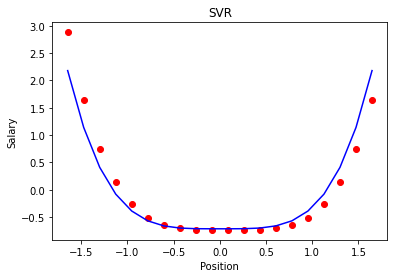

In [5]:
W = np.dot(np.transpose(betasv), suppvect)
print(f"W : {W} - b: {b}")
# First transform 6.5 to feature scaling
to_predict = 10
sc_X_val = sc_X.transform(np.array([[to_predict]]))
print("normalized_in",sc_X_val)
# Second predict the value
scaled_y_pred = predict_poly(b, betasv, sc_X_val, suppvect, deg=deg, gamma=gamma)
print("normalized_out",scaled_y_pred)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 
print(f'Prediction for {to_predict} is ', y_pred)

plt.scatter(x, y , color="red")
pred = [float(predict_poly(b, betasv, x[i], suppvect, deg=deg, gamma=gamma)) for i in range(x.size)]
#print(pred)
plt.plot(x, pred, color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

scaled_back_pred = sc_y.inverse_transform(pred)
plt.scatter(orig_x, orig_y , color="red")
plt.plot(orig_x, scaled_back_pred, color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()
scaled_back_pred

PREDICTION:  [10106.04011756]


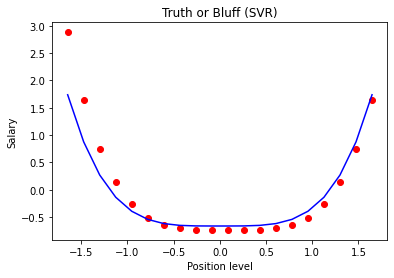

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly',gamma=gamma, degree=deg)
Y = np.hstack(y)
X = x
regressor.fit(X, Y)
y_scal = sc_X.transform(np.array([[to_predict]]))
y_pred = regressor.predict(y_scal)
y_pred = sc_y.inverse_transform(y_pred)
print("PREDICTION: ",y_pred)
# X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [8]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.1
b: [-0.66399172]
gamma: 0.9
C: 1.0
sv: [[-1.64750894]
 [-1.47408695]
 [-1.30066495]
 [-1.12724296]
 [-0.95382097]
 [ 0.78039897]
 [ 0.95382097]
 [ 1.12724296]
 [ 1.30066495]
 [ 1.47408695]
 [ 1.64750894]]
supp index: [ 0  1  2  3  4 14 15 16 17 18 19]


In [9]:
params["coef0"]

0.0

In [10]:
regressor.dual_coef_

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        -0.07103097, -1.        , -1.        , -1.        , -1.        ,
        -0.92896903]])